In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt


In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0


In [ ]:
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 41s 53ms/step - loss: 0.5772 - accuracy: 0.7902 - val_loss: 0.3933 - val_accuracy: 0.8563
Epoch 2/10
750/750 [==============================] - 39s 52ms/step - loss: 0.3614 - accuracy: 0.8704 - val_loss: 0.3434 - val_accuracy: 0.8763
Epoch 3/10
750/750 [==============================] - 40s 54ms/step - loss: 0.3131 - accuracy: 0.8845 - val_loss: 0.3174 - val_accuracy: 0.8822
Epoch 4/10
750/750 [==============================] - 39s 52ms/step - loss: 0.2774 - accuracy: 0.8992 - val_loss: 0.2836 - val_accuracy: 0.8980
Epoch 5/10
750/750 [==============================] - 39s 52ms/step - loss: 0.2530 - accuracy: 0.9070 - val_loss: 0.2746 - val_accuracy: 0.9010
Epoch 6/10
750/750 [==============================] - 41s 55ms/step - loss: 0.2315 - accuracy: 0.9144 - val_loss: 0.2729 - val_accuracy: 0.9032
Epoch 7/10
750/750 [==============================] - 39s 52ms/step - loss: 0.2140 - accuracy: 0.9211 - val_loss: 0.2796 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.2685 - accuracy: 0.9086
Test accuracy: 0.9085999727249146


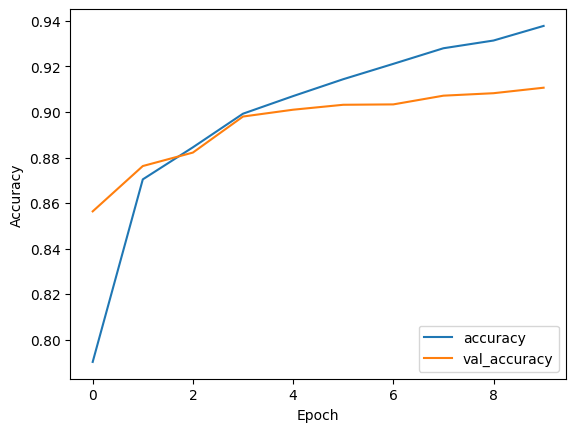

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()